In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file1 = '/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/bandas/110/BAND.OUT'
file2 = '/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/bandas/110/BANDLINES.OUT'

In [3]:
bandas_file = np.loadtxt(file1)
high_energy_points_file = np.loadtxt(file2)

In [4]:
bandas = pd.DataFrame(bandas_file, columns=['x','y'])
high_energy_points = pd.DataFrame(high_energy_points_file, columns=['x','y'])

In [5]:
bandas

,x,y
0,0.000000,-2.281844
1,0.010726,-2.281841
2,0.021451,-2.281830
3,0.032177,-2.281811
4,0.042902,-2.281785
...,...,...
16395,4.200868,2.077805
16396,4.211556,2.078468
16397,4.222244,2.078972
16398,4.232933,2.079288


# Plotting the first band

In [6]:
bandas_x = bandas.x[:400]
bandas['y'] = bandas['y'].apply(lambda x: x * 27.2)
bandas.y

0       -62.066167
1       -62.066067
2       -62.065765
3       -62.065264
4       -62.064564
           ...    
16395    56.516298
16396    56.534321
16397    56.548048
16398    56.556628
16399    56.559546
Name: y, Length: 16400, dtype: float64

In [7]:
lista = [(i,i) for i in high_energy_points.x]
lista = list(set(lista))
lista

[(4.243621096, 4.243621096),
 (1.846084413, 1.846084413),
 (0.6757137926, 0.6757137926),
 (0.0, 0.0),
 (3.073250475, 3.073250475),
 (2.397536683, 2.397536683),
 (1.065837333, 1.065837333),
 (3.463374015, 3.463374015)]

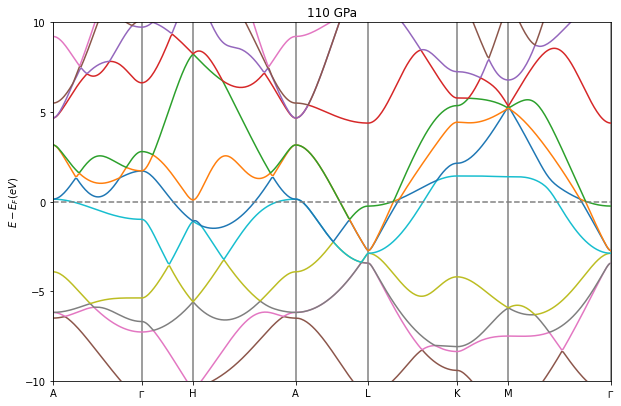

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6.6)
plt.ylim(-10, 10)
plt.xlim(0,bandas.x.max())
for i in range(len(lista)):
    ax.plot(lista[i],[high_energy_points.y[0]*27.2,high_energy_points.y[1]*27.2 ], c='gray')
for i in range(int(len(bandas.y.values.reshape(-1,1)) / 400)):
    inicio = i * 400
    fin = (i+1) * 400
    ax.plot(bandas_x,bandas.y[inicio : fin])
ax.plot([0,bandas.x.max()],[0,0],'--', c='gray')
ax.plot(bandas_x, bandas.y[:400])
ax.set_xticks(ticks=[lista[i][0] for i in range(len(lista))])
ax.set_xticklabels([r"$\mathbb{\Gamma}$",r"A",r"$\mathbb{\Gamma}$",r"A",r"K",r"L",r"H",r"M"])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylabel(r"$E-E_{F}(eV)$")
ax.set_title('110 GPa')
plt.savefig('BANDS.png')
plt.show()